In [1]:
import os
import numpy as np
import pandas as pd 

from stable_baselines3 import PPO, SAC, TD3, DDPG, A2C, DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from gym_donkeycar.envs.donkey_env import DonkeyEnv
from stable_baselines3.common.callbacks import CheckpointCallback, CallbackList

import sys

from torch.utils.data.dataset import Dataset, random_split

import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

import gym

path = r"c:\Users\spige\memoire\gym-donkeycar-retry\gym-donkeycar\CarConsumptionModel"
sys.path.insert(0, path)

from donkey_environment.ConsumptionWrapper import ConsumptionWrapper
from utils.callbacks import CustomProgressBarCallback, SaveObservations
from utils.ExpertDataset import ExpertDataSet
import matplotlib.pyplot as plt

### Plot of the target actions

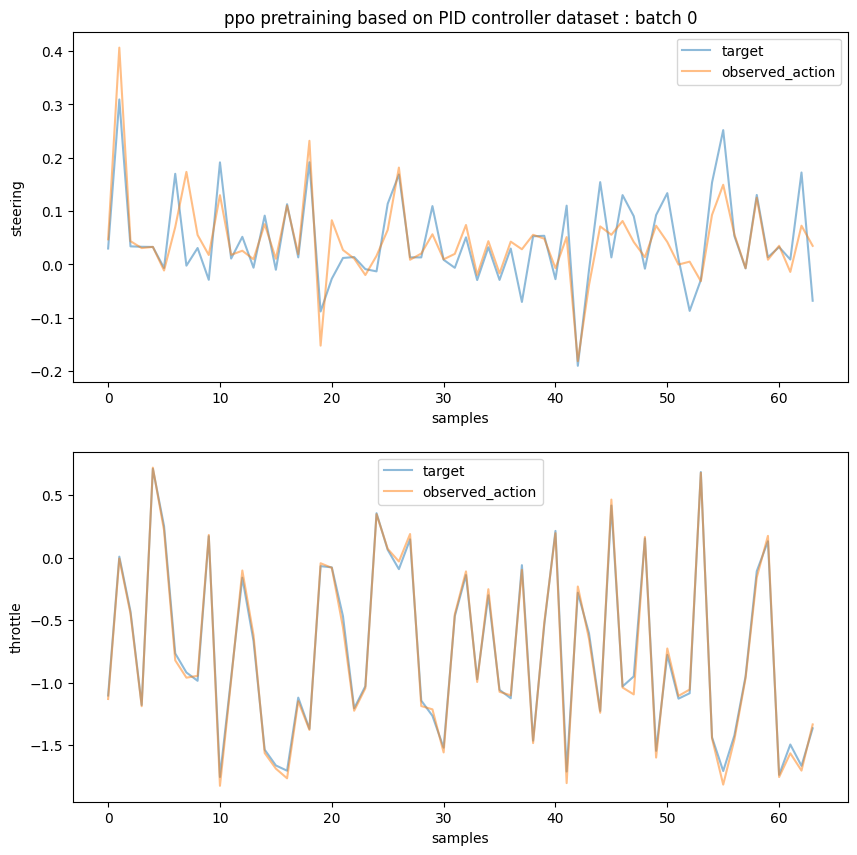

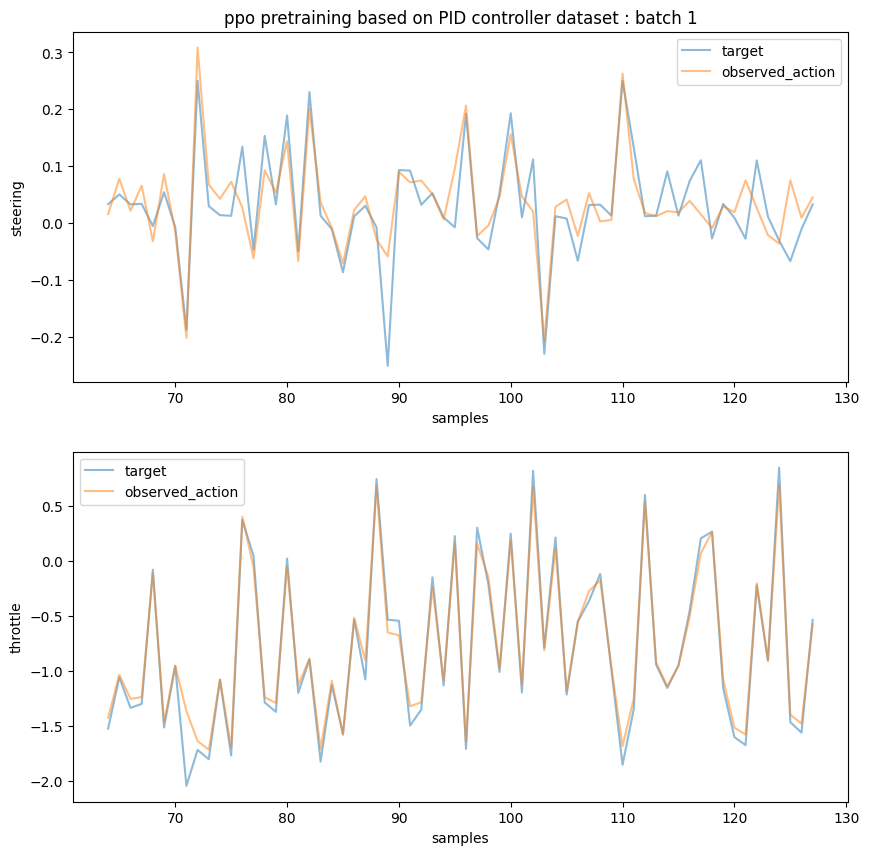

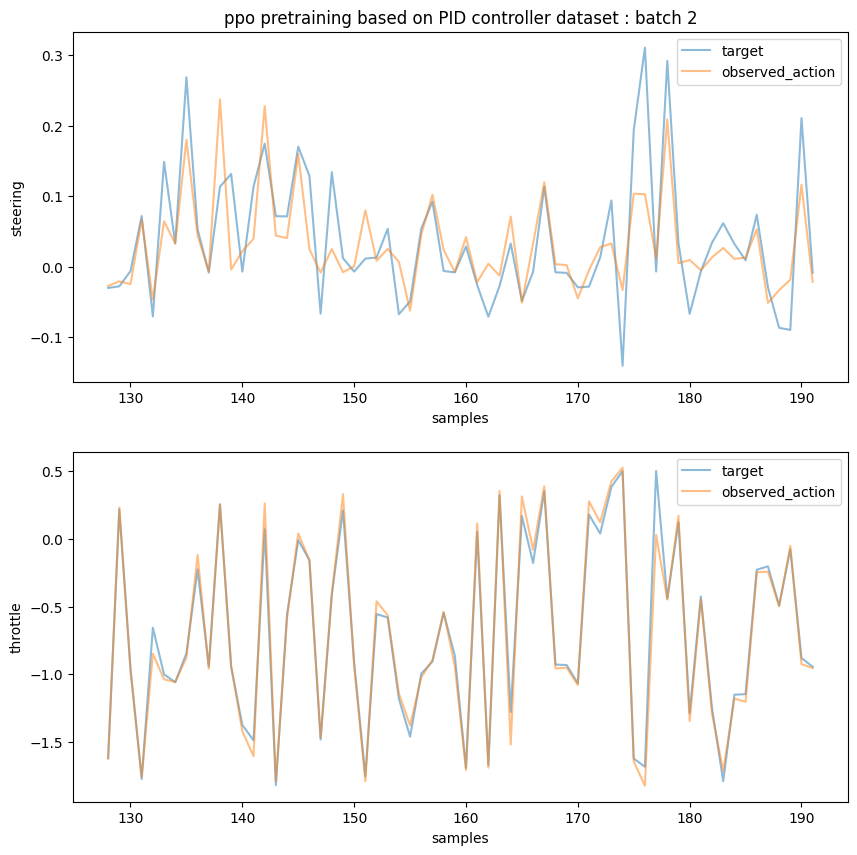

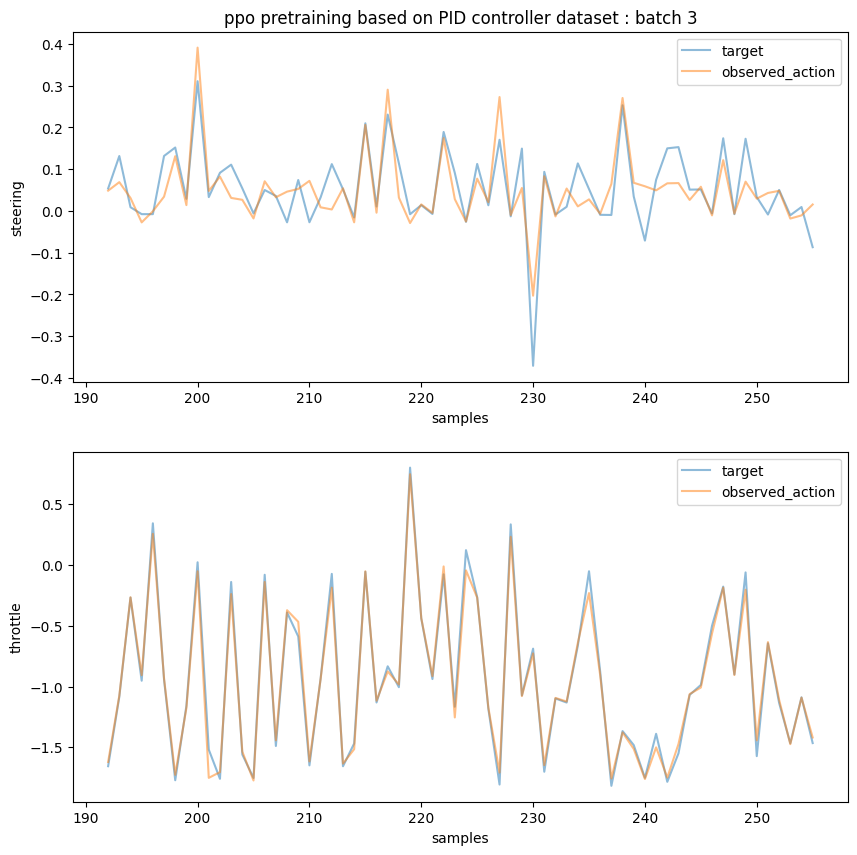

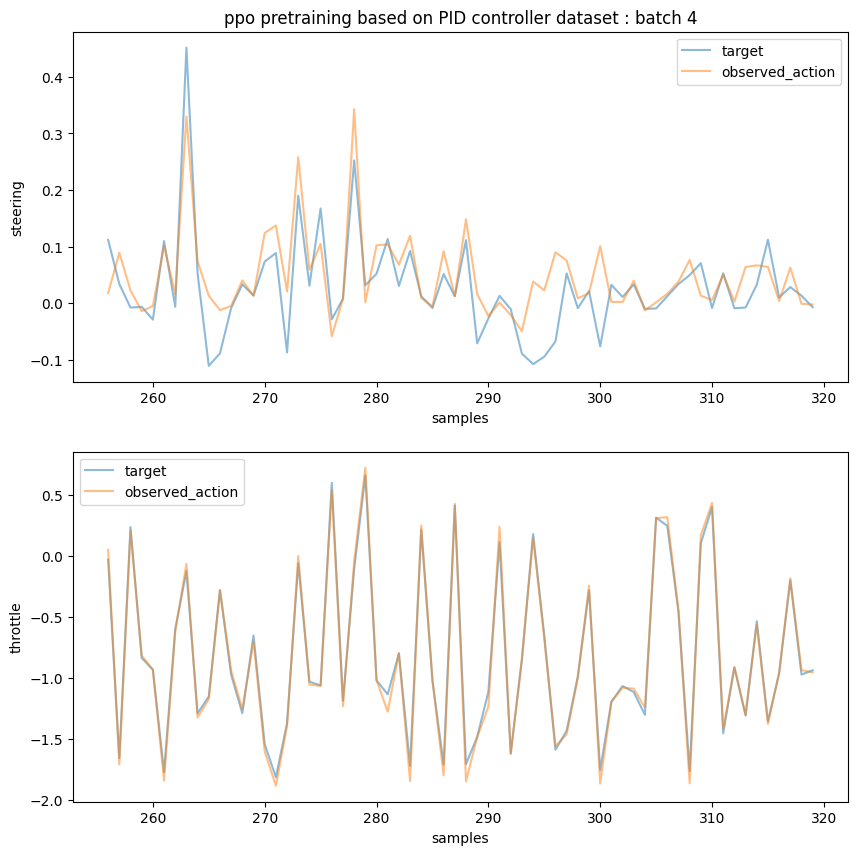

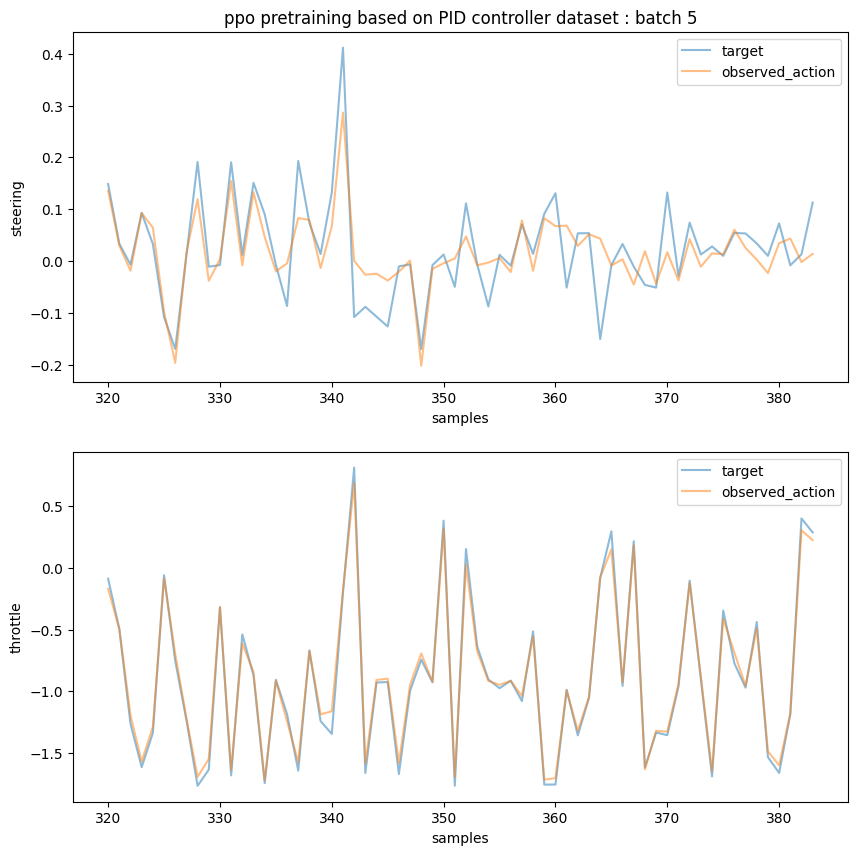

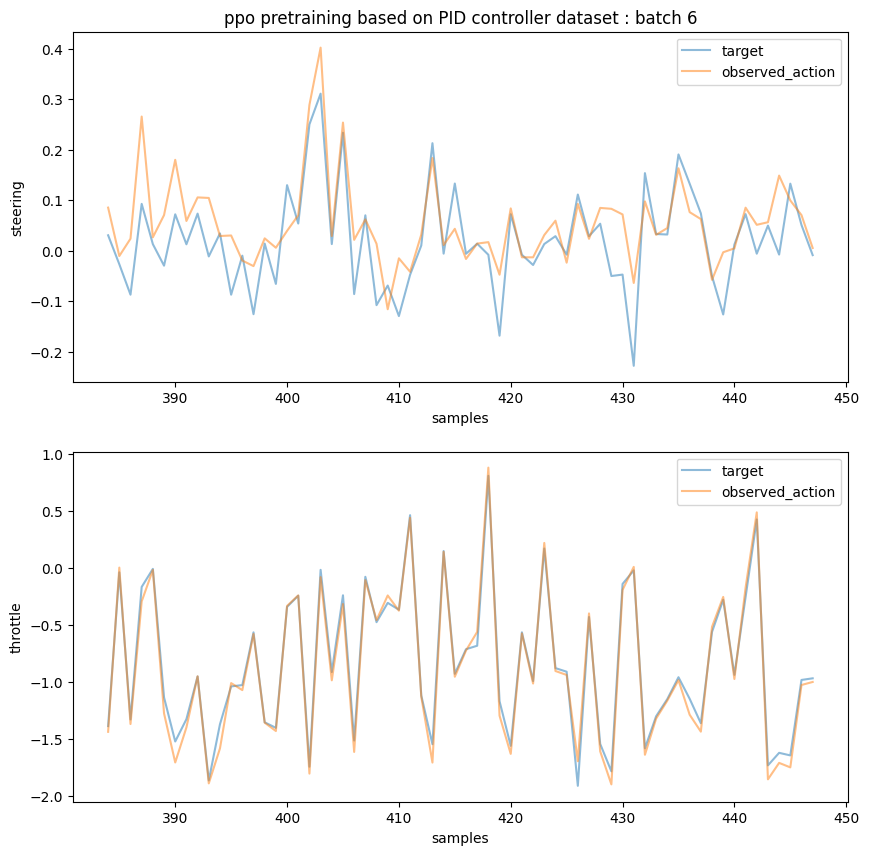

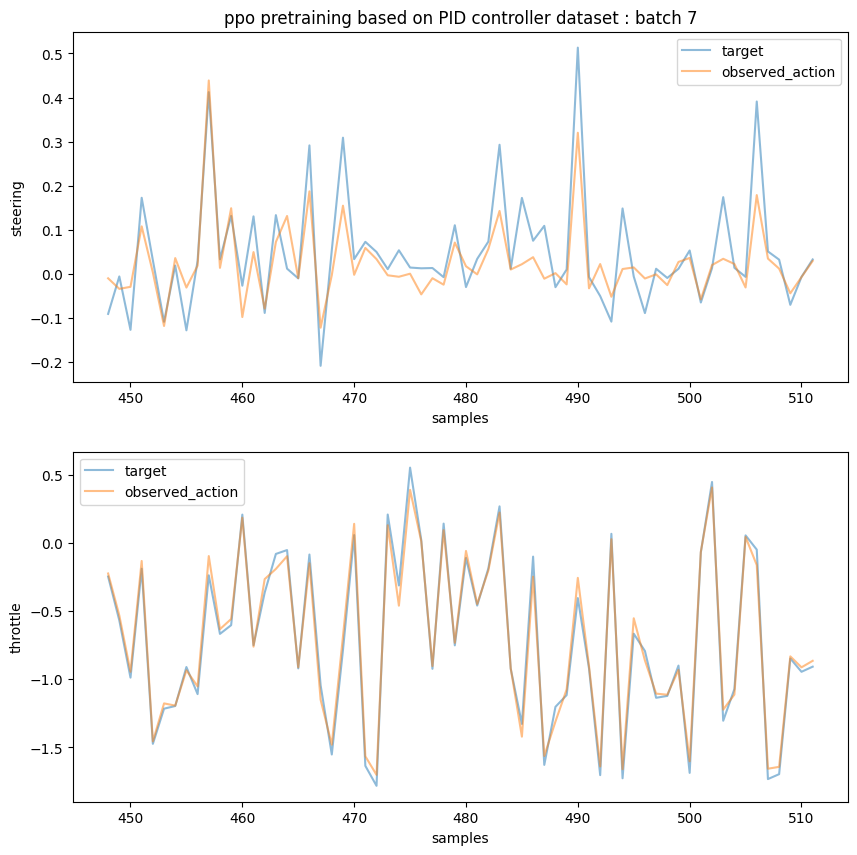

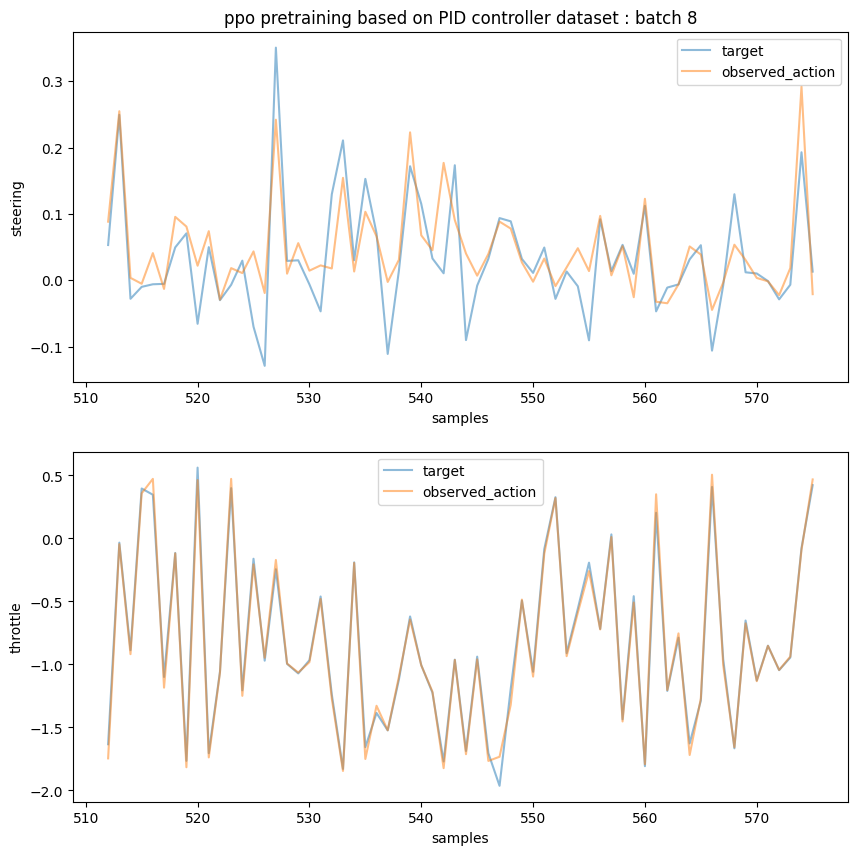

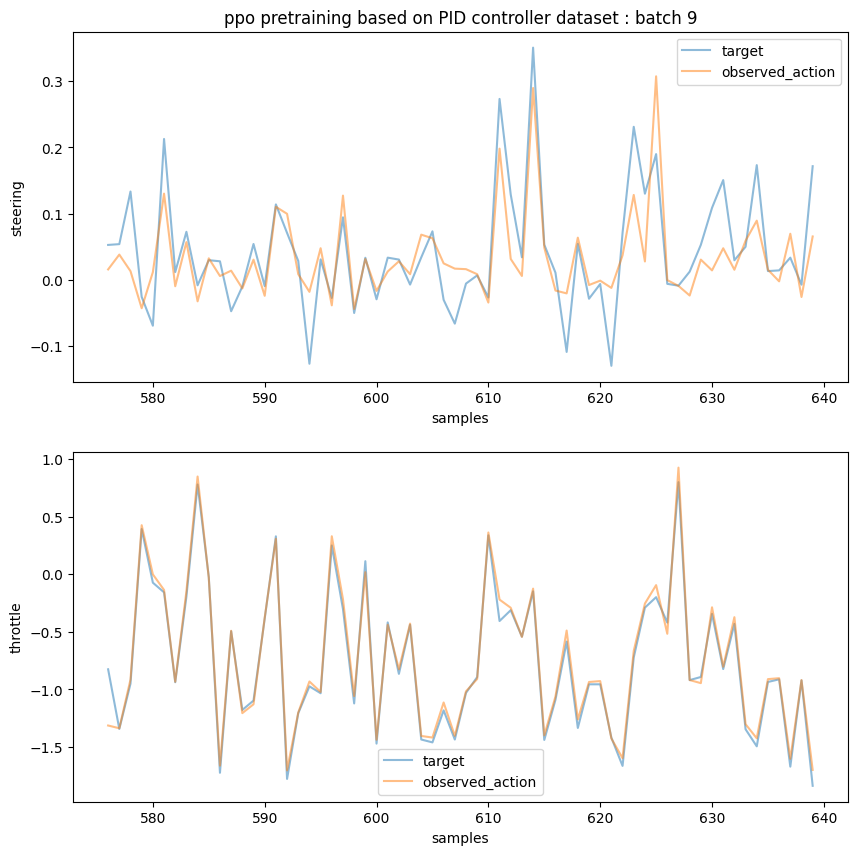

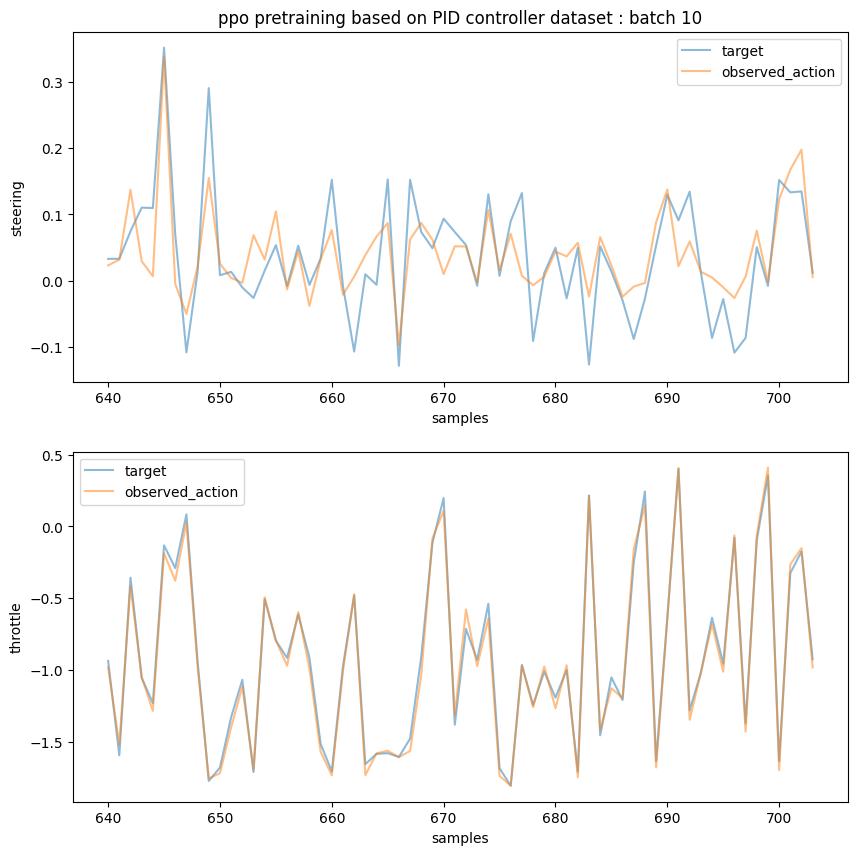

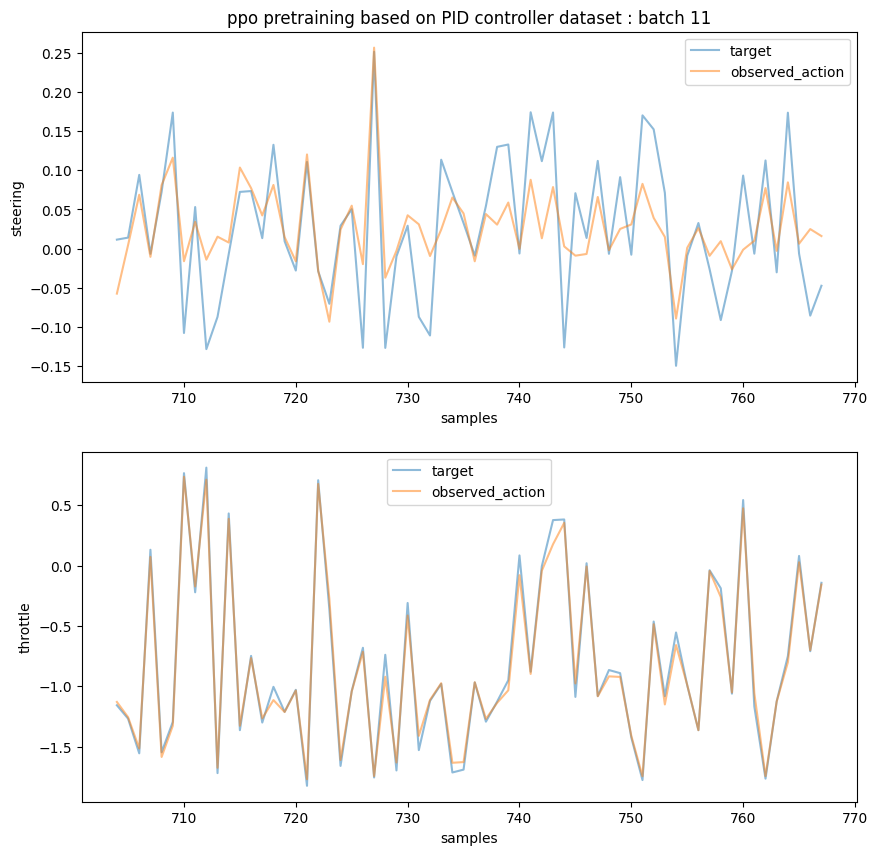

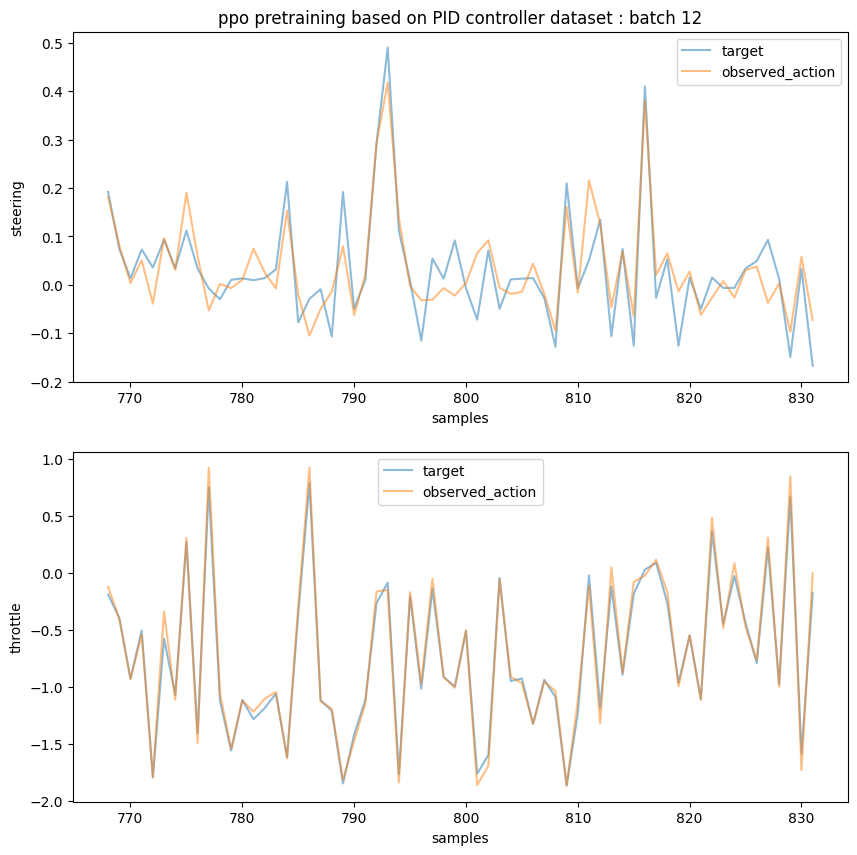

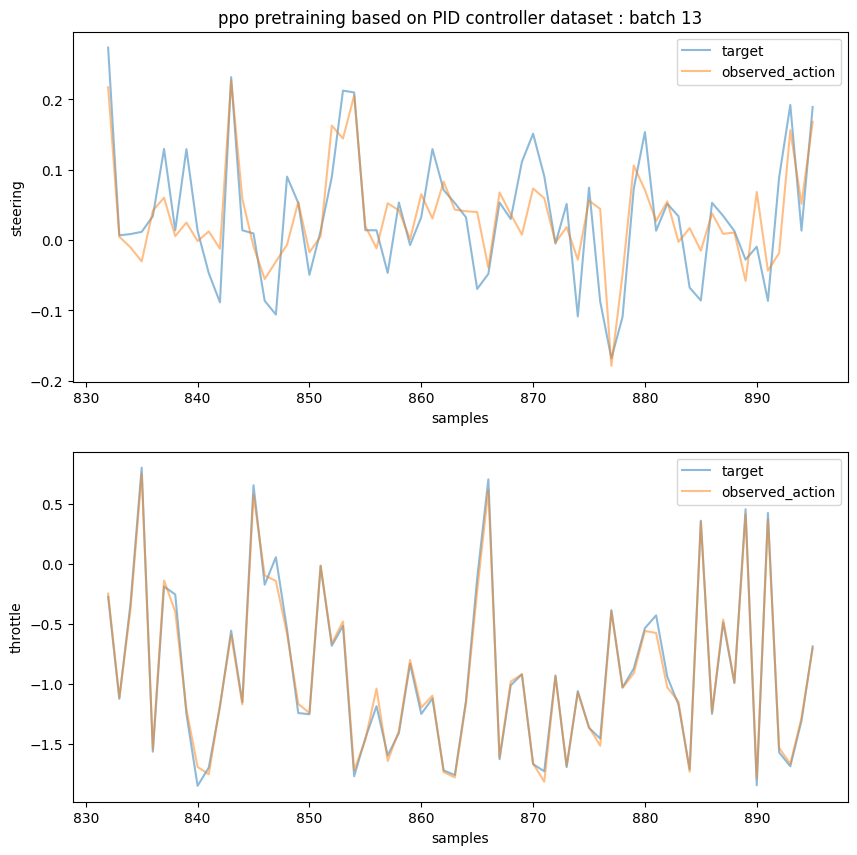

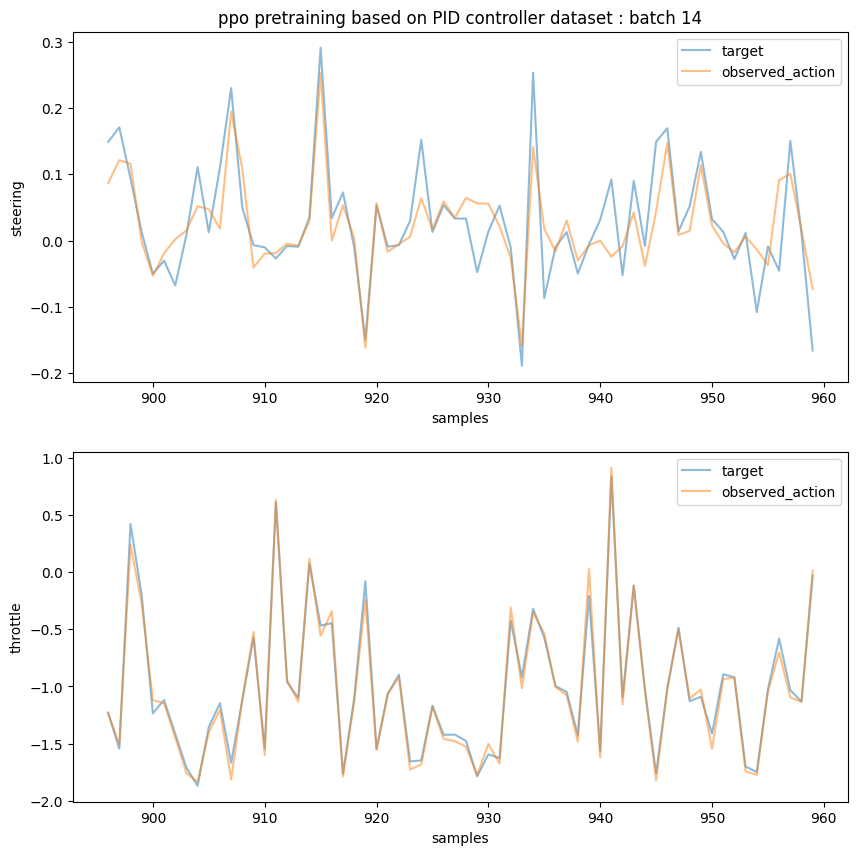

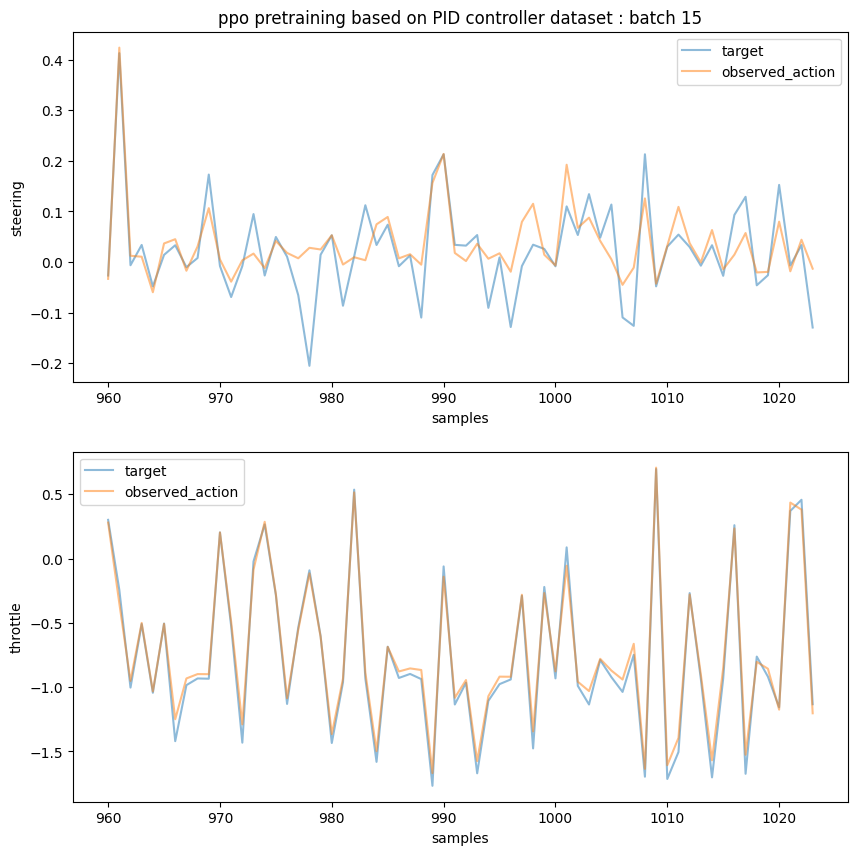

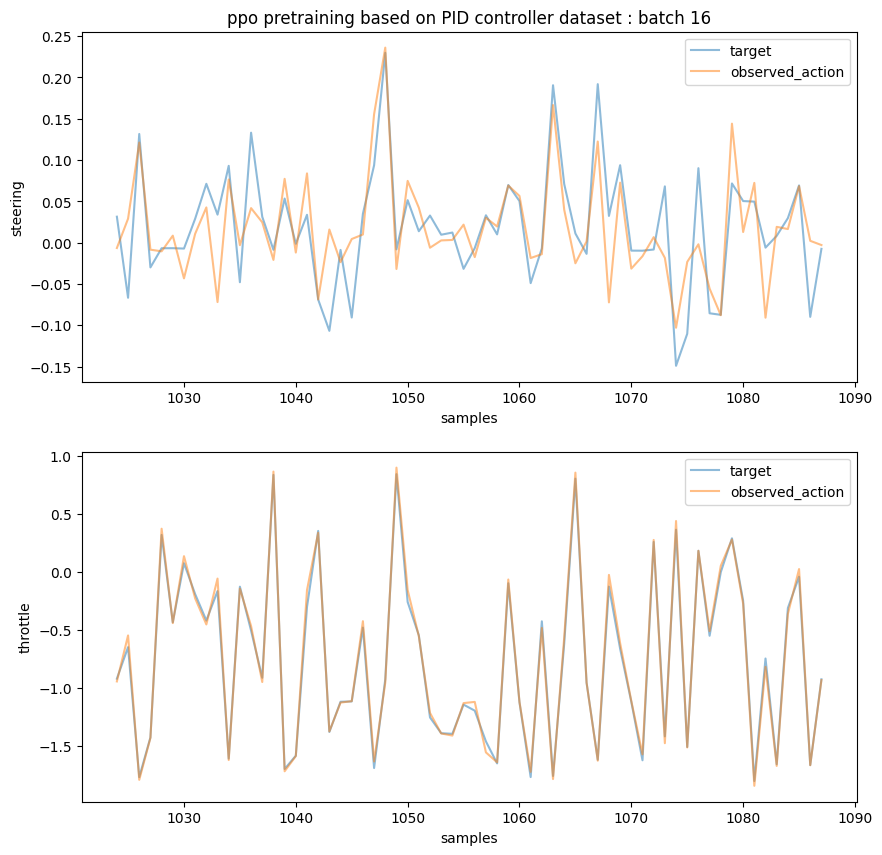

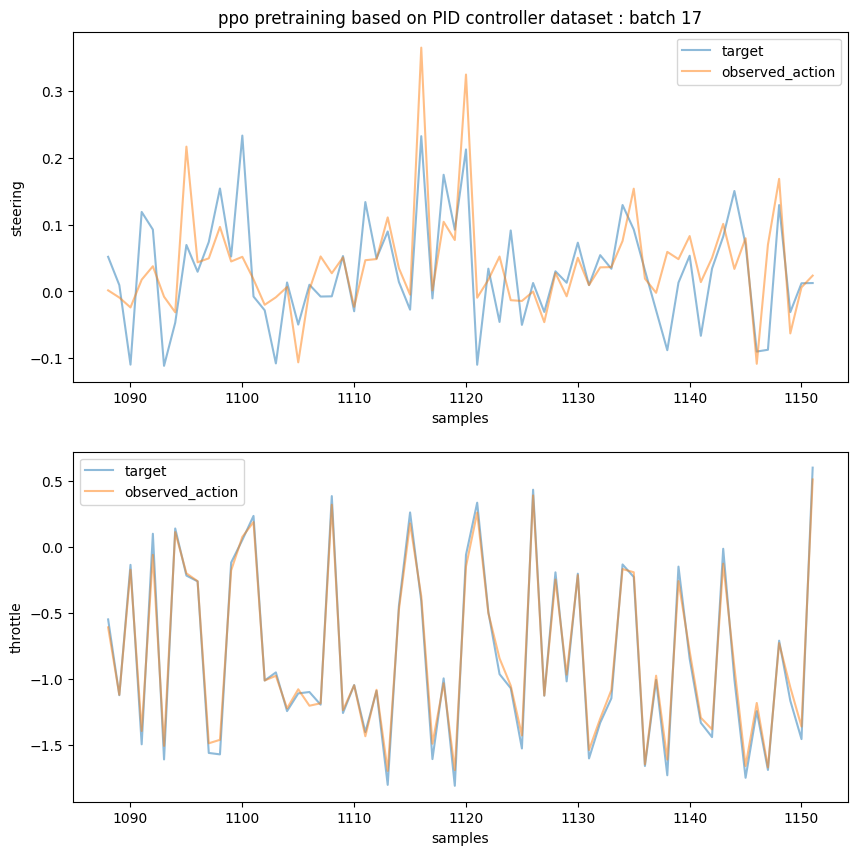

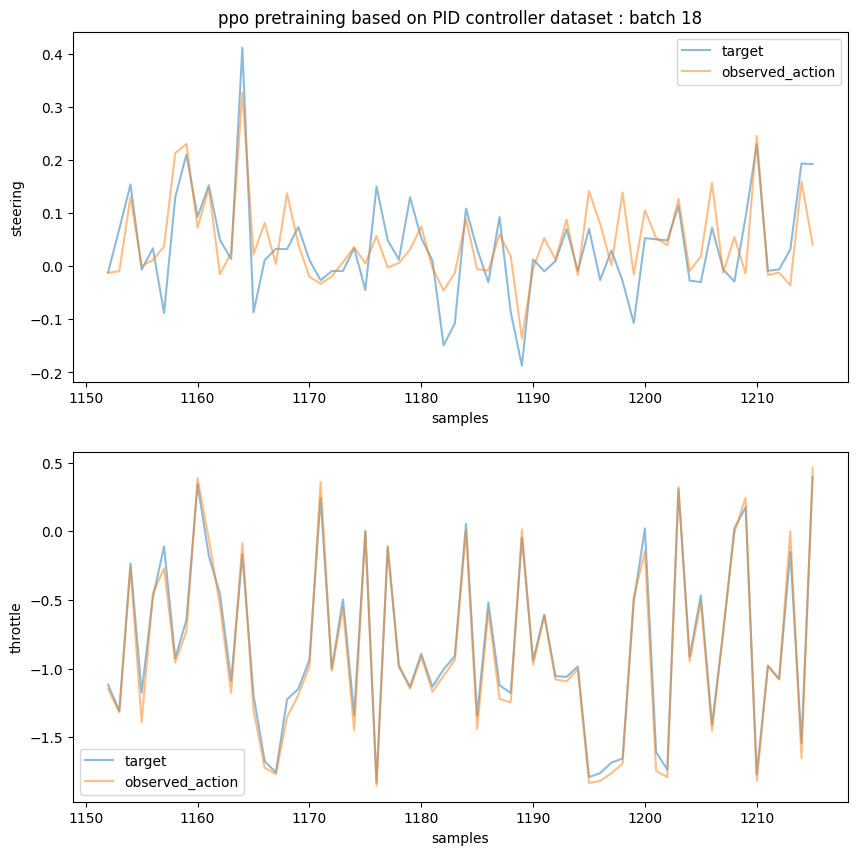

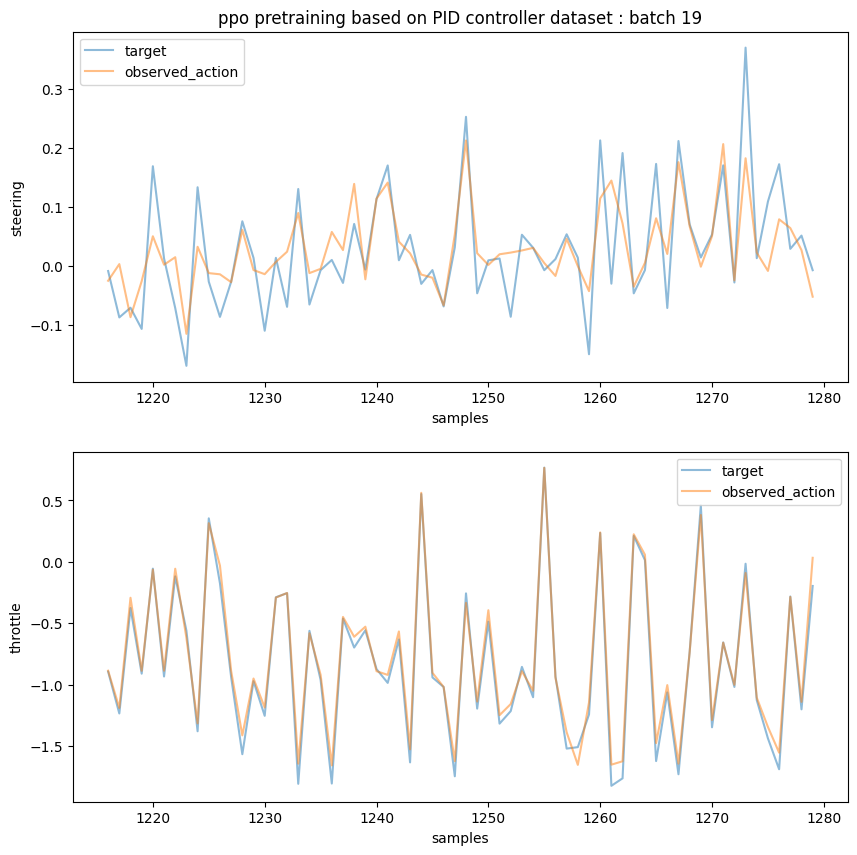

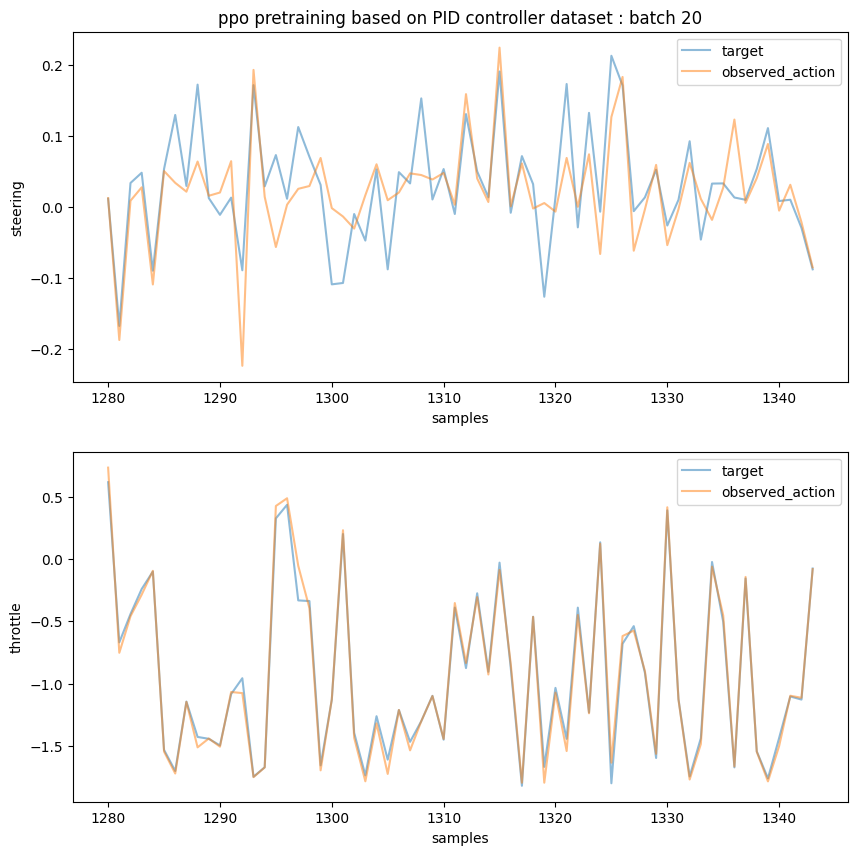

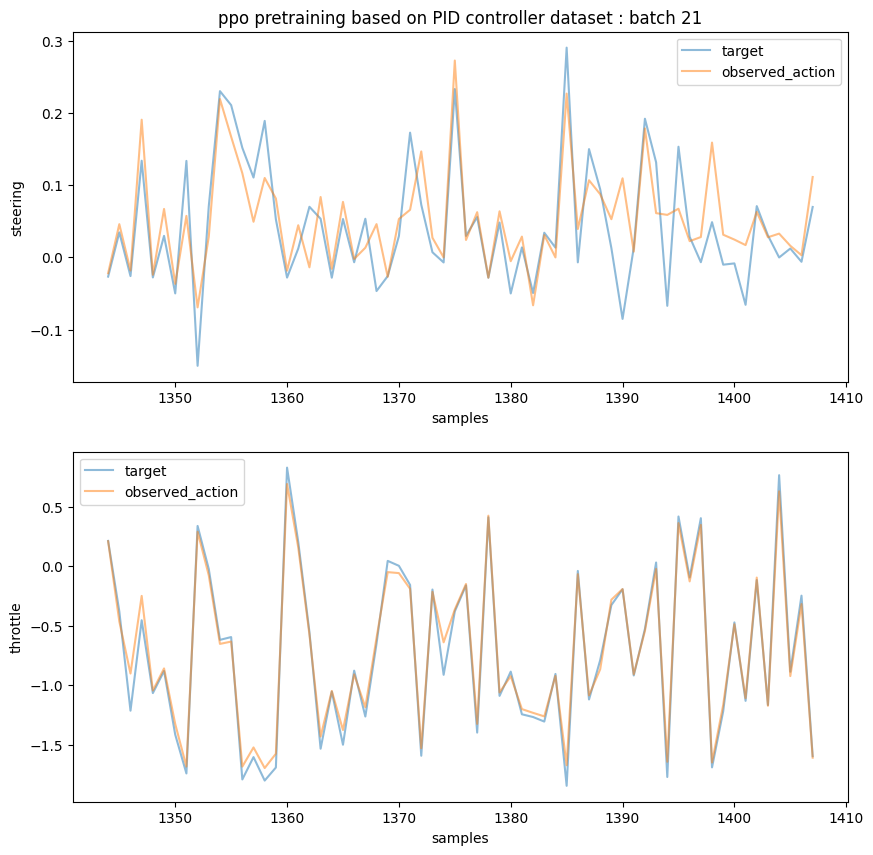

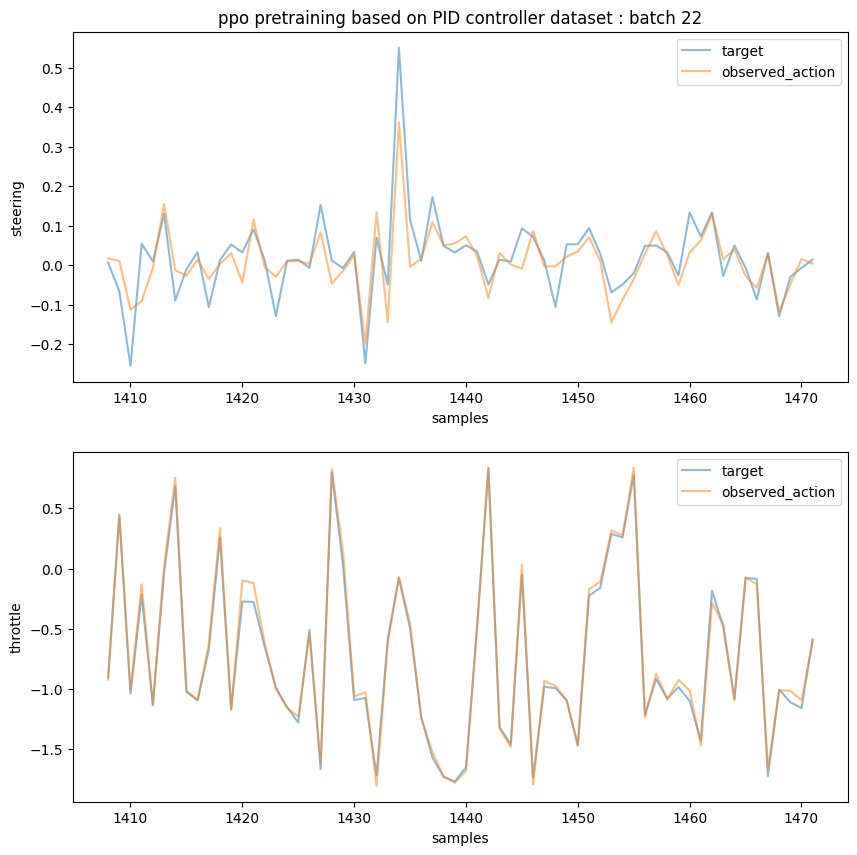

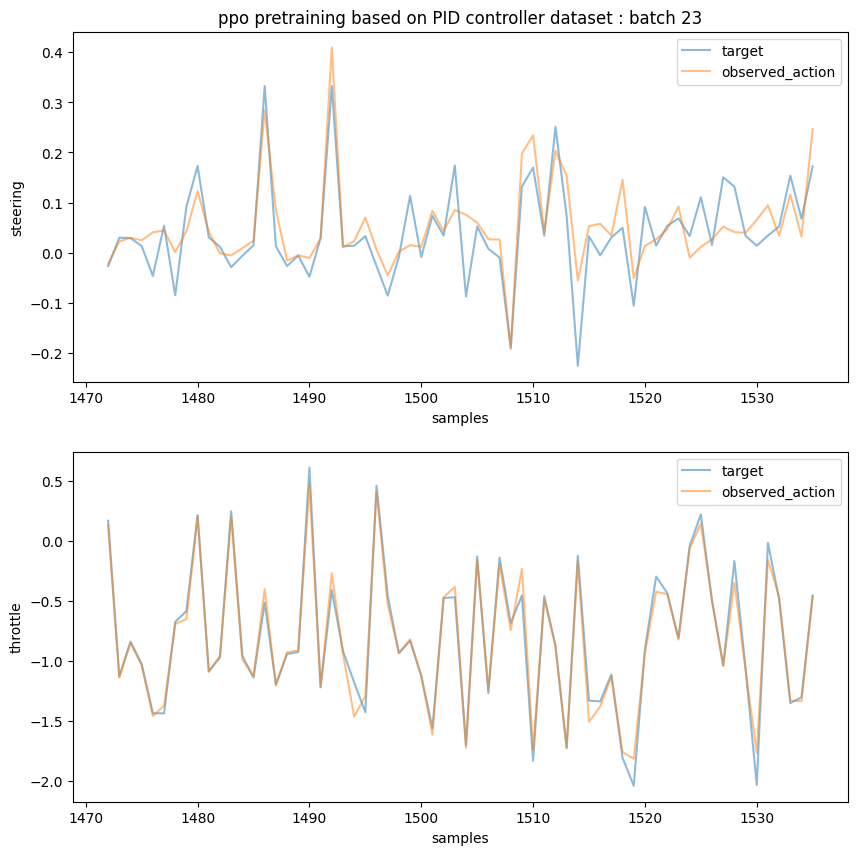

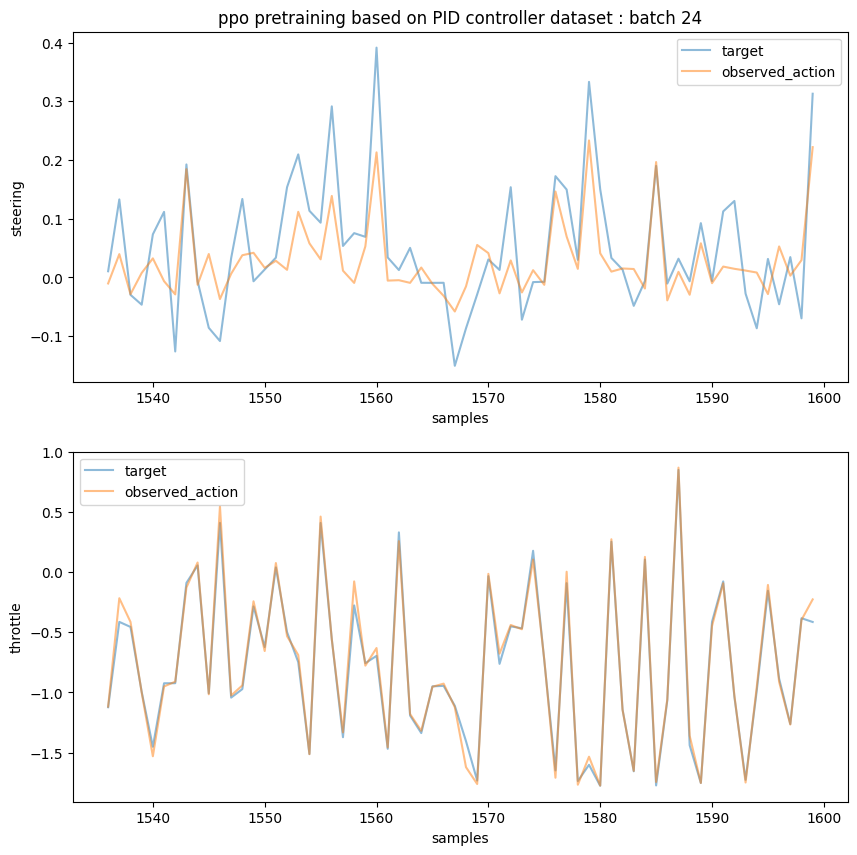

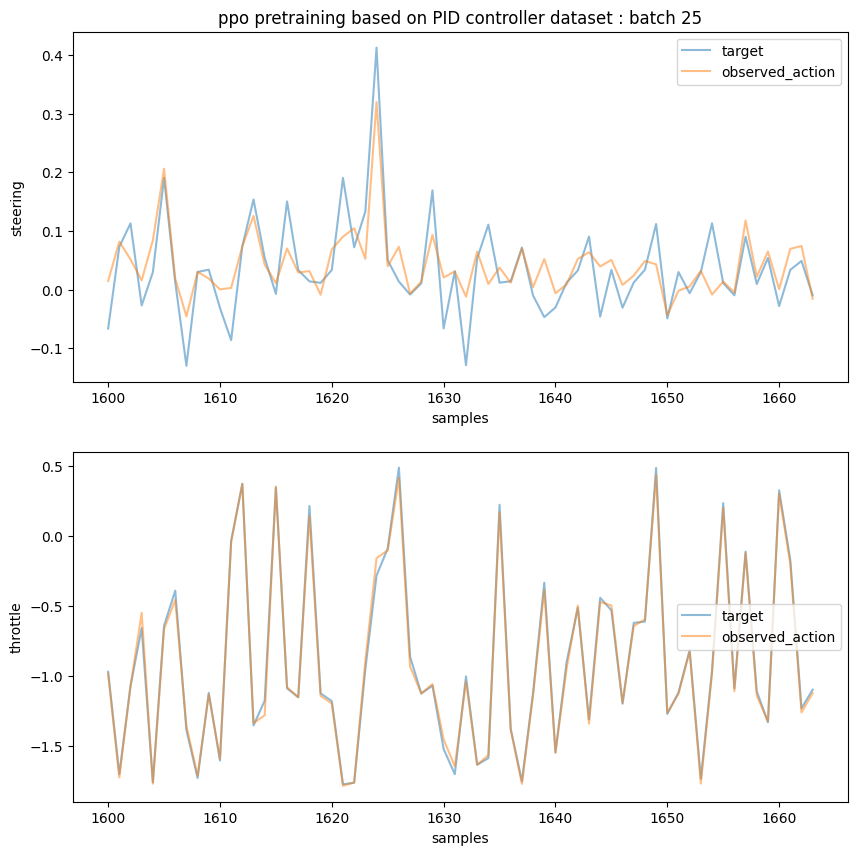

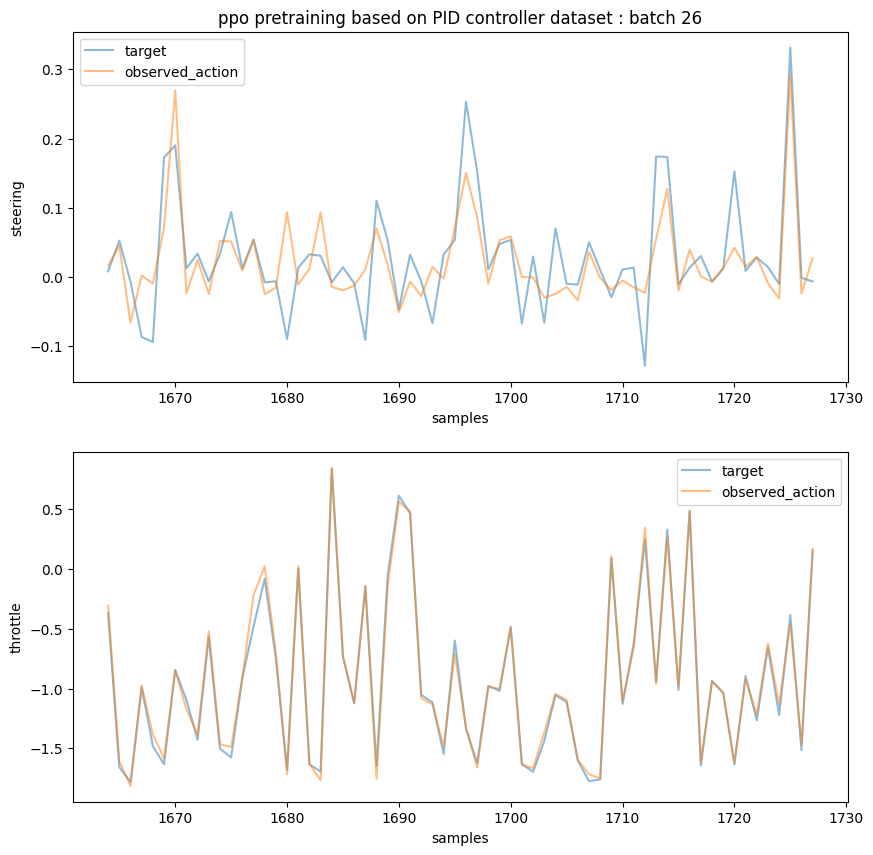

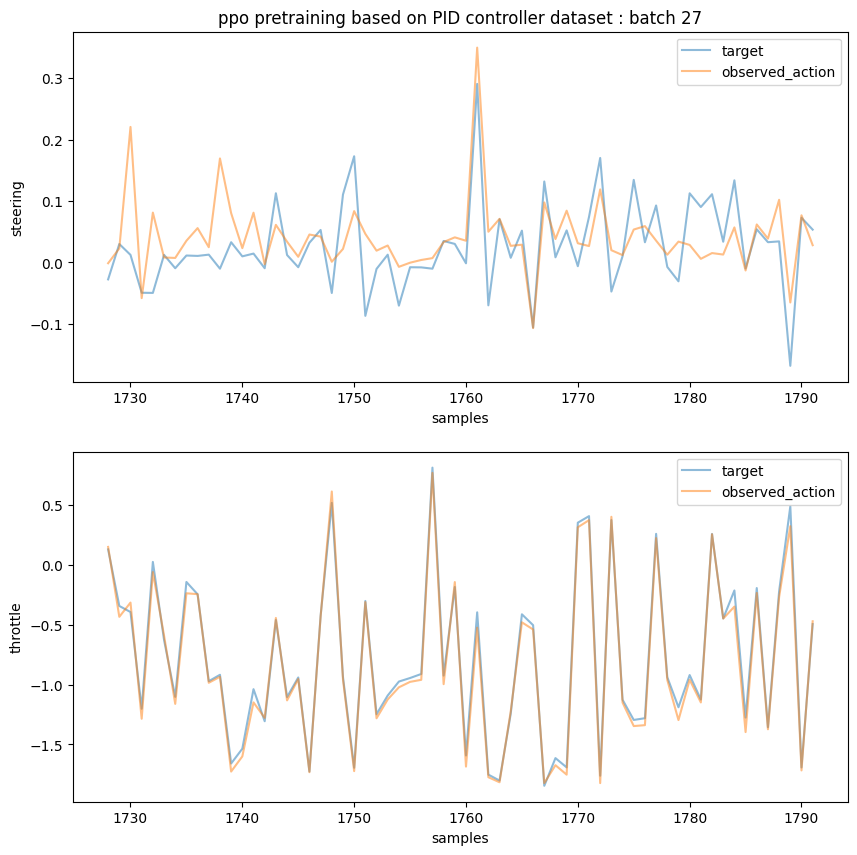

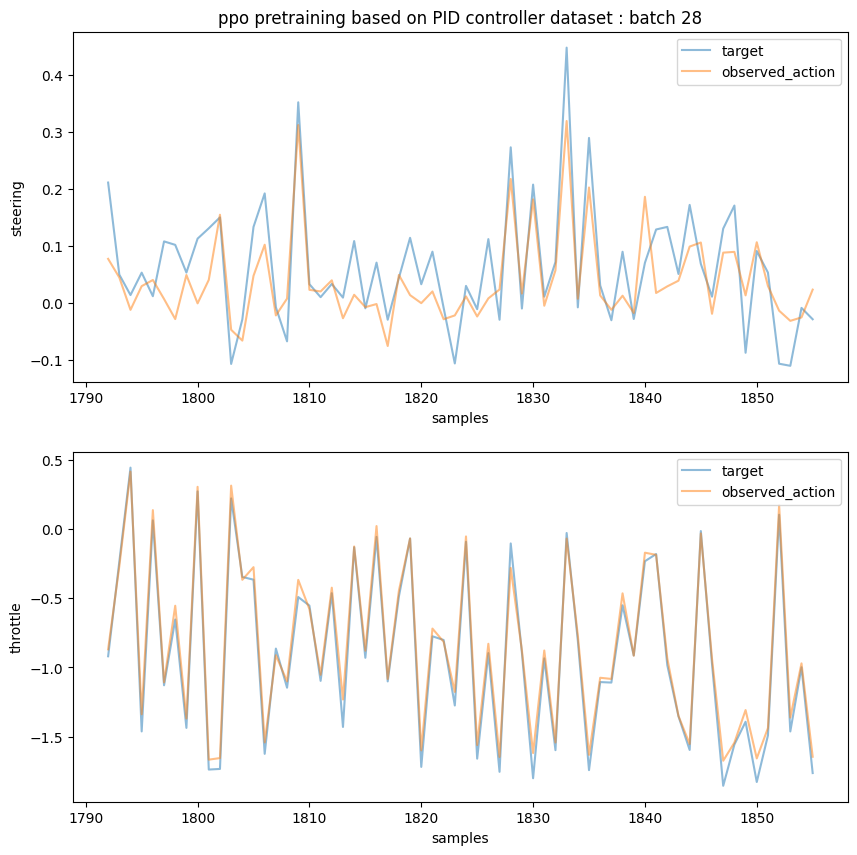

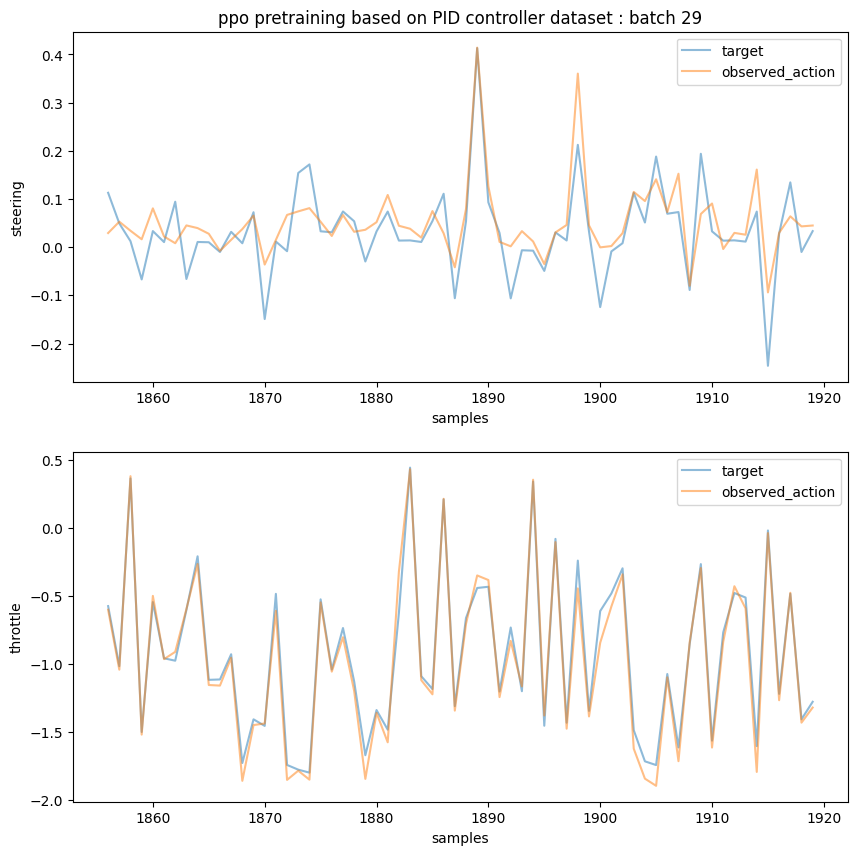

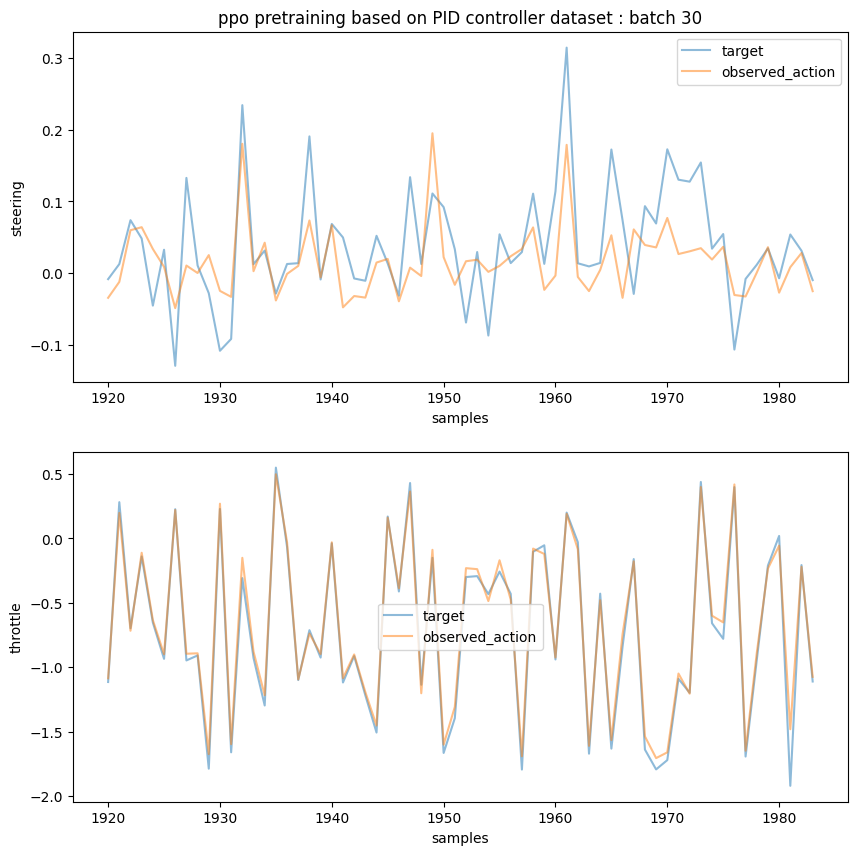

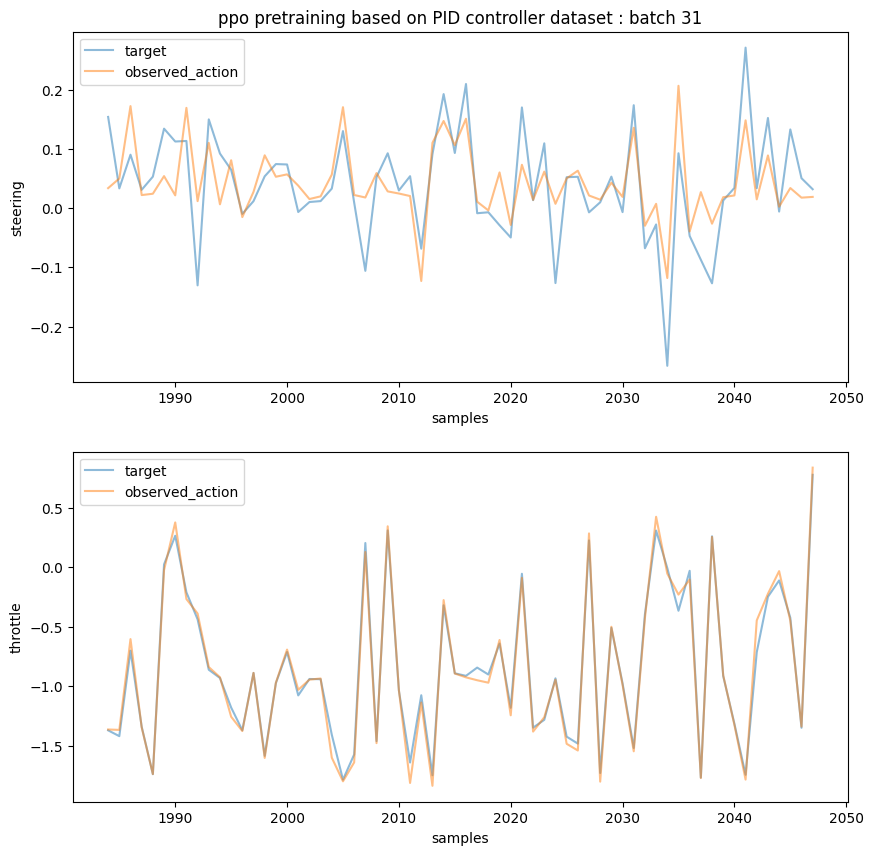

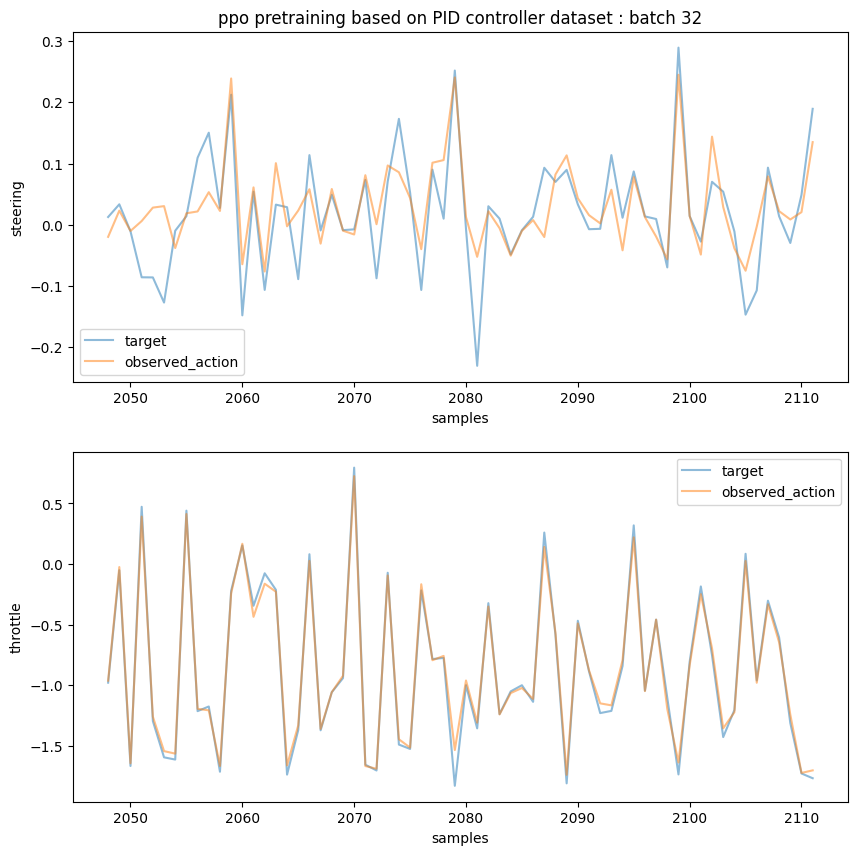

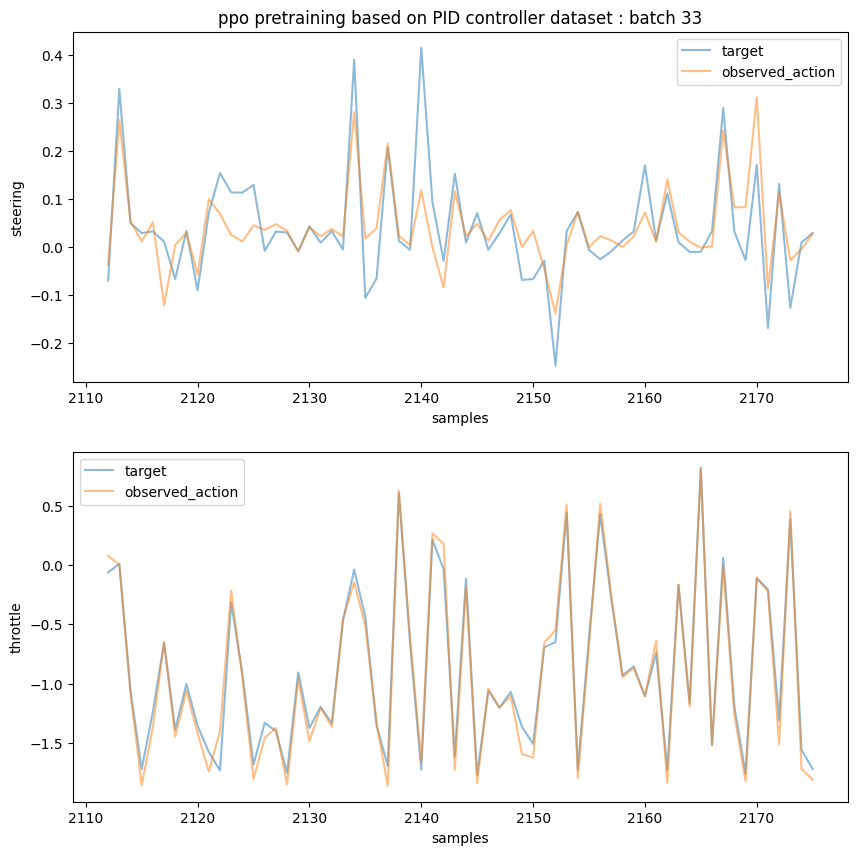

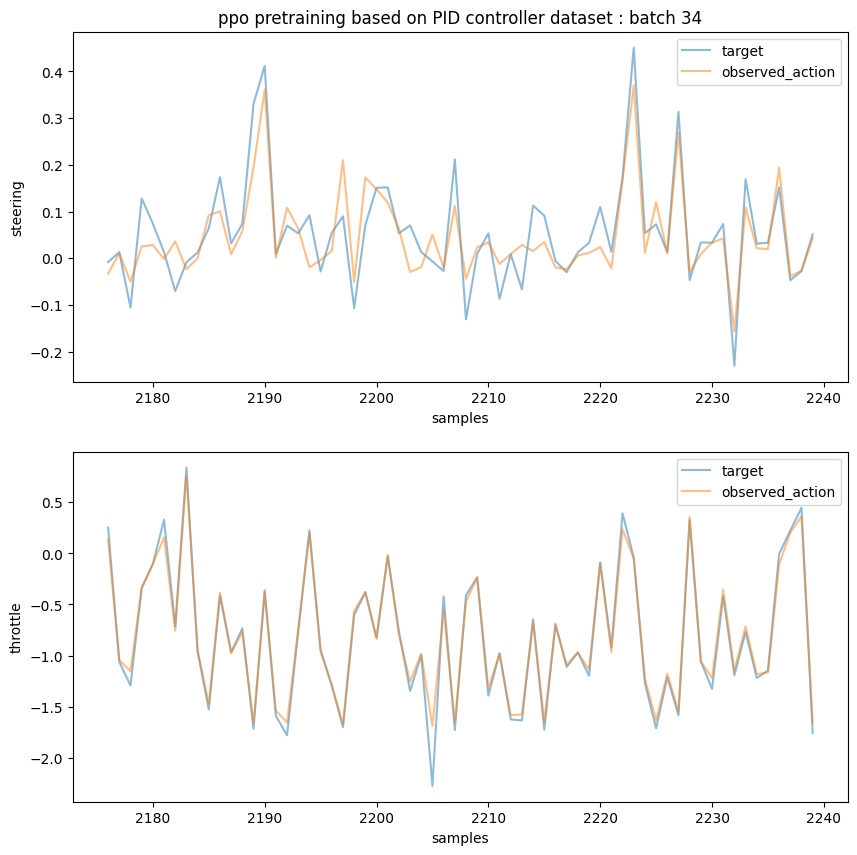

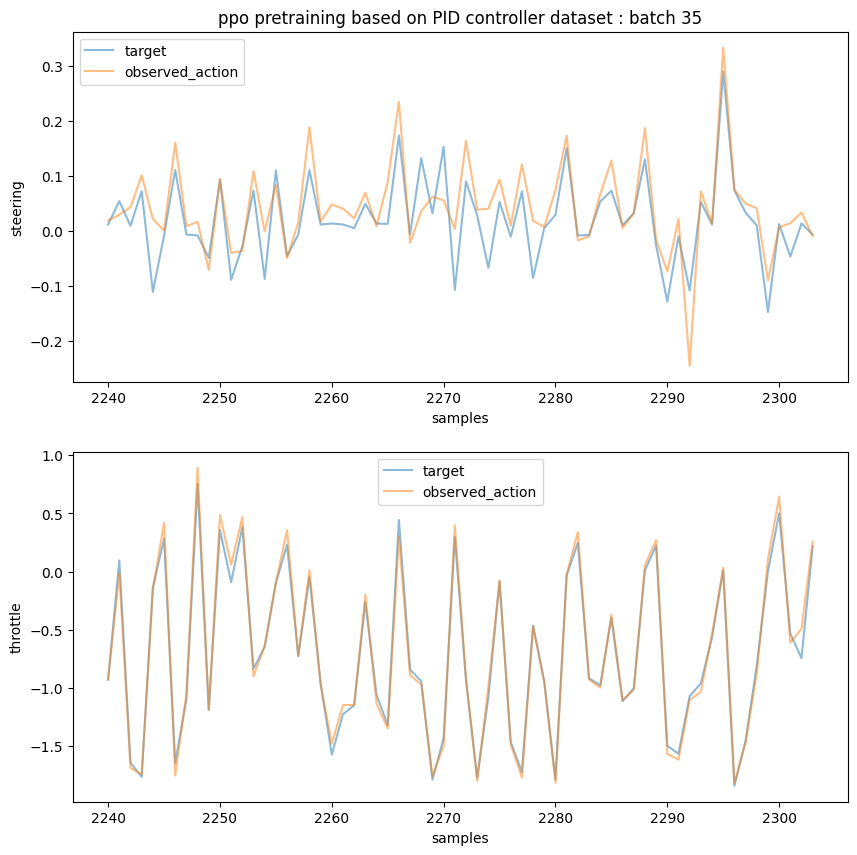

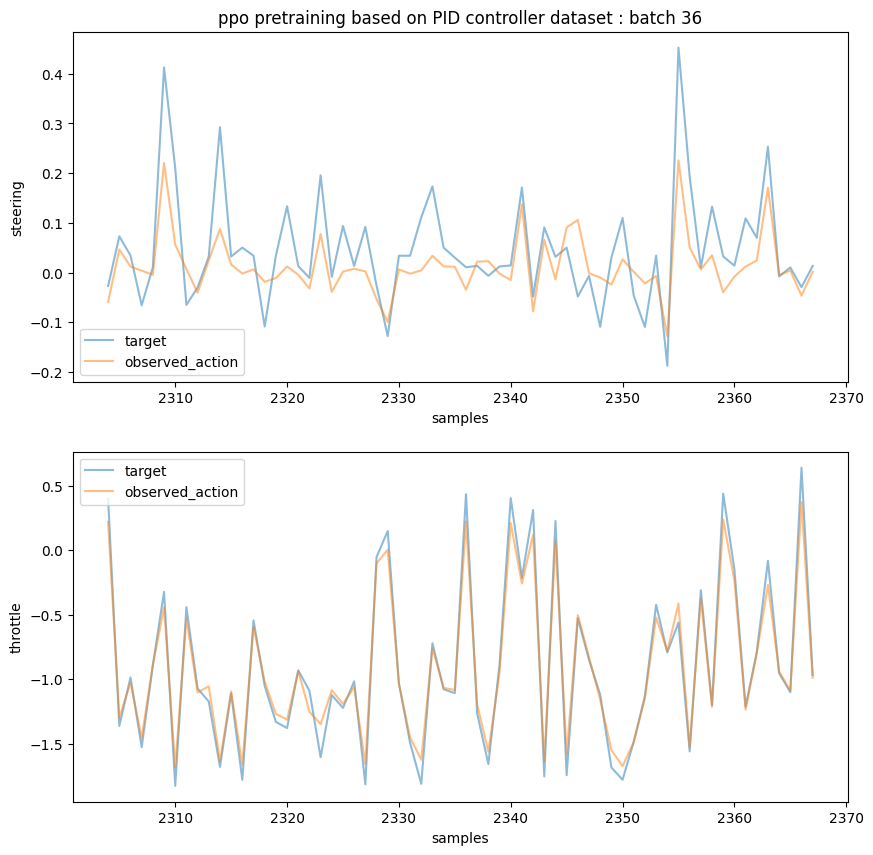

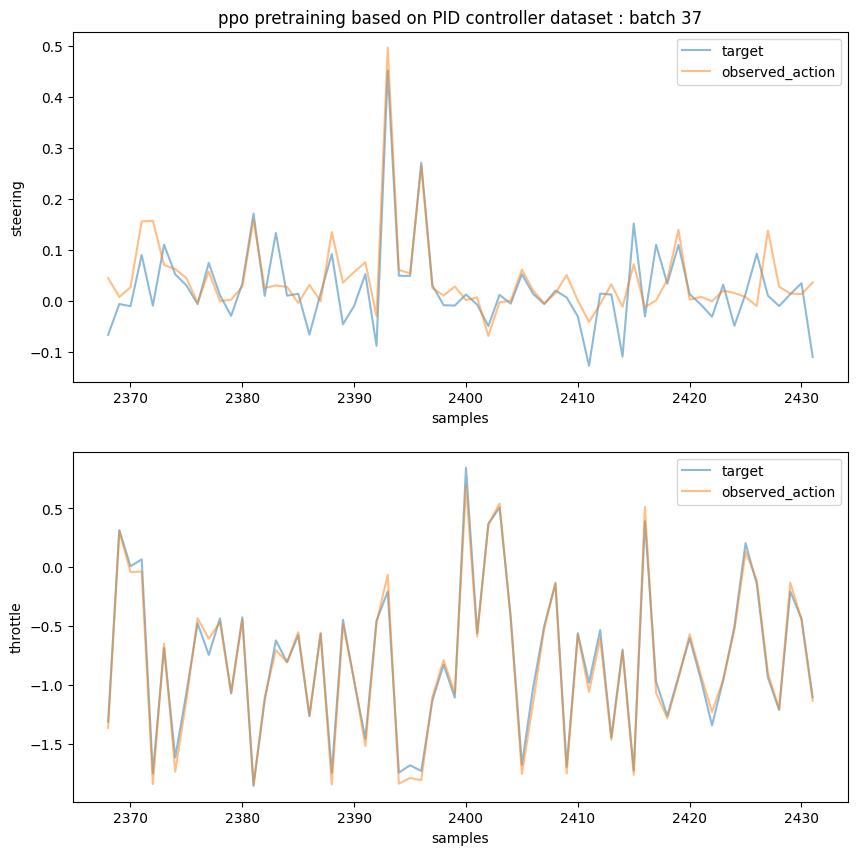

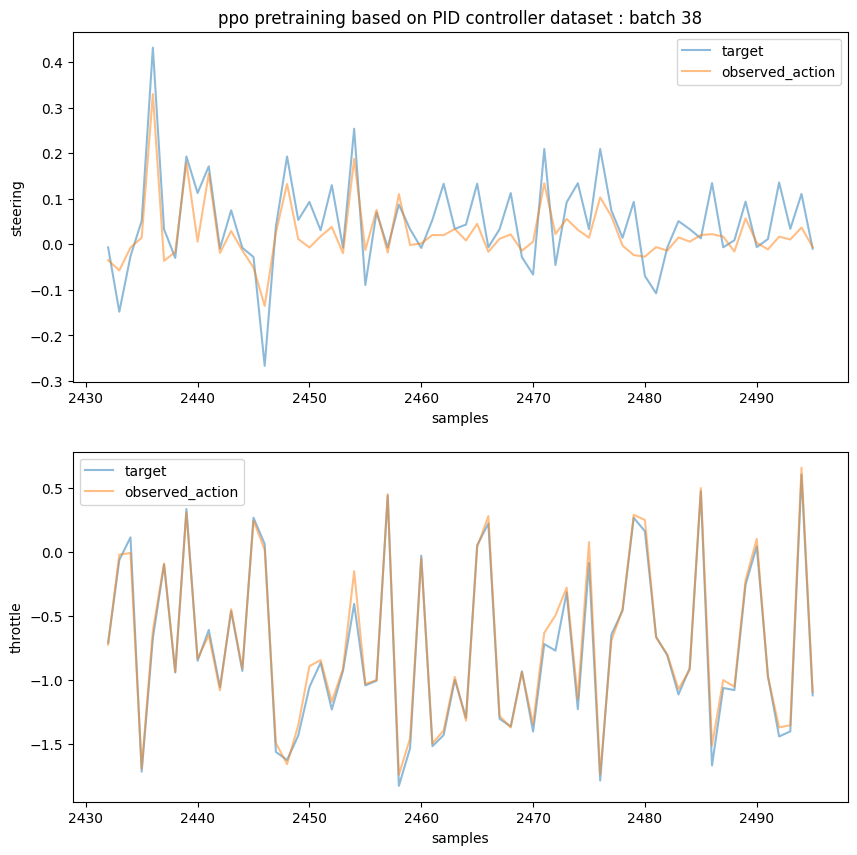

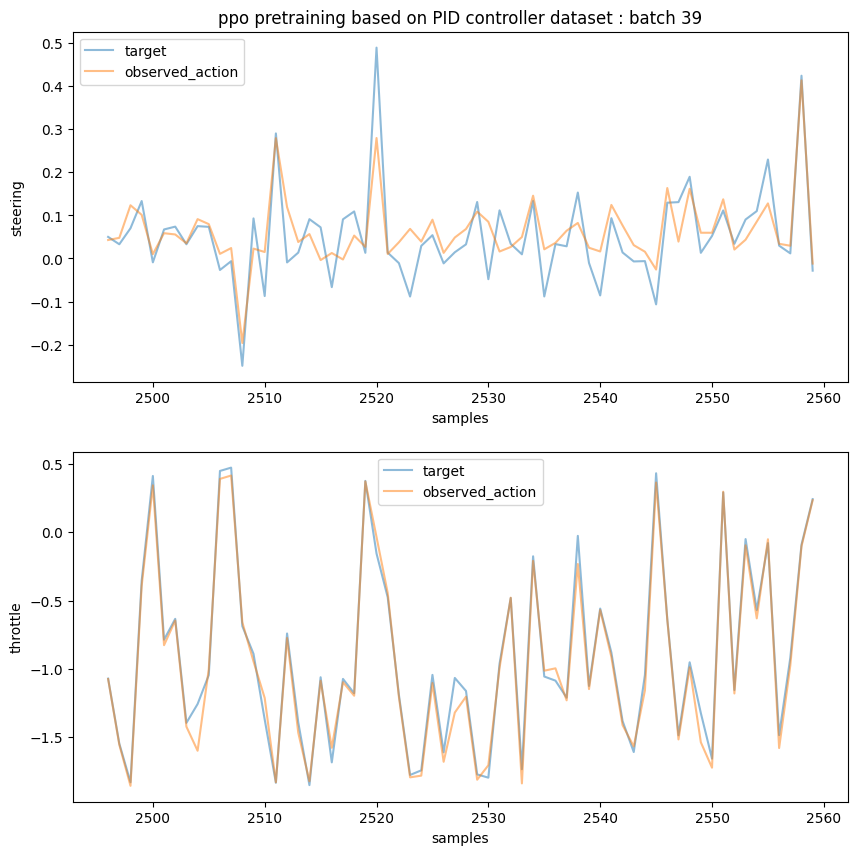

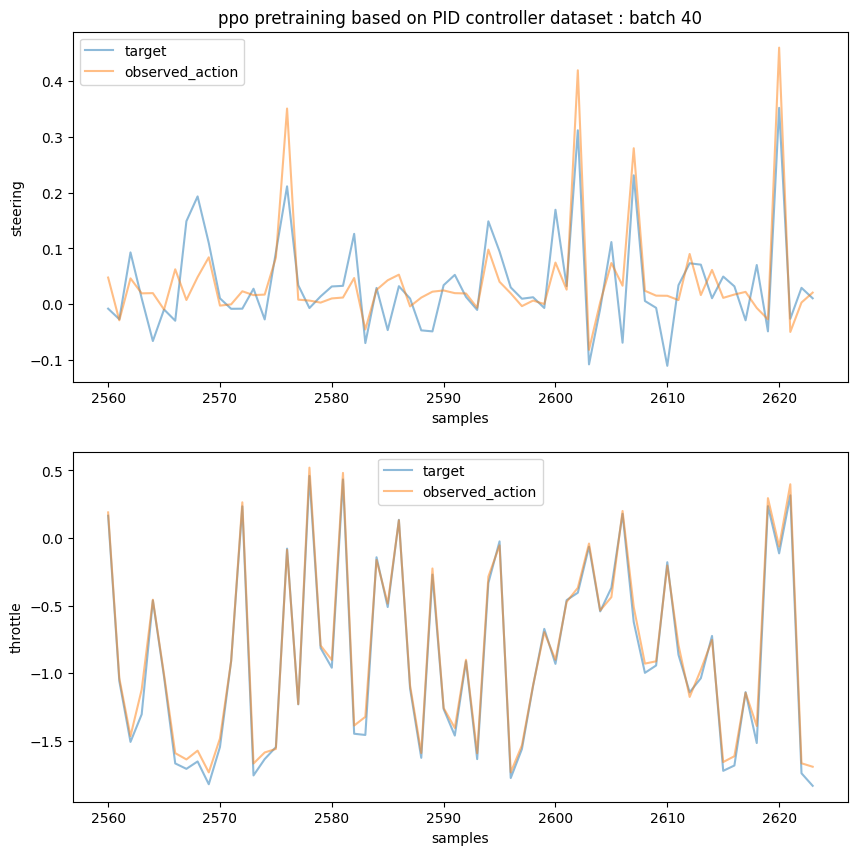

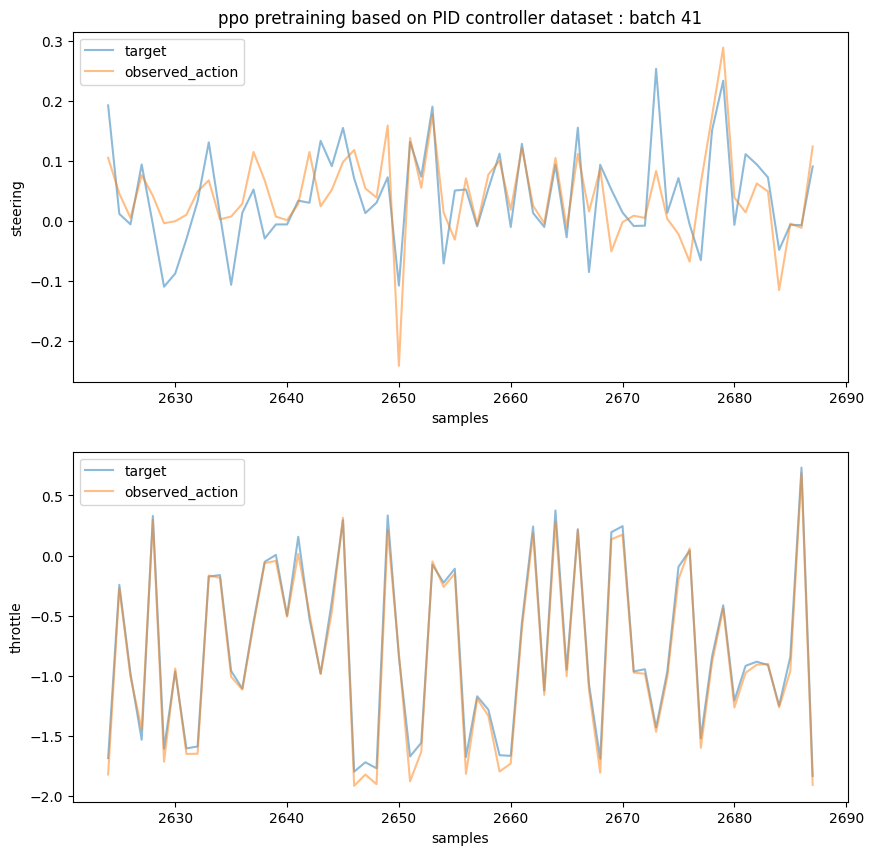

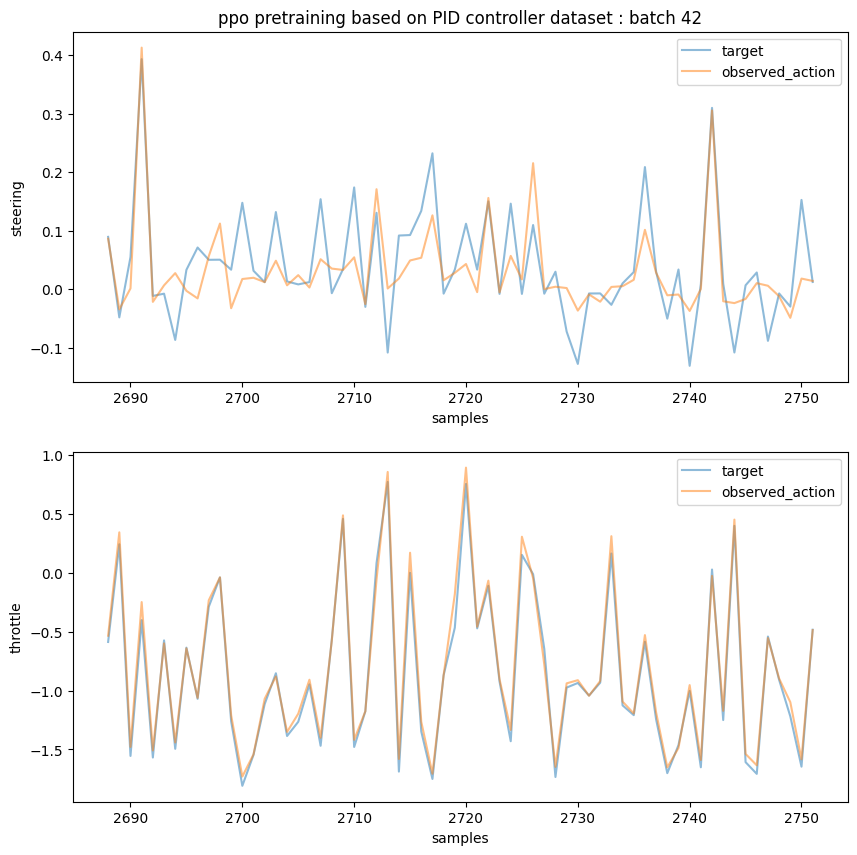

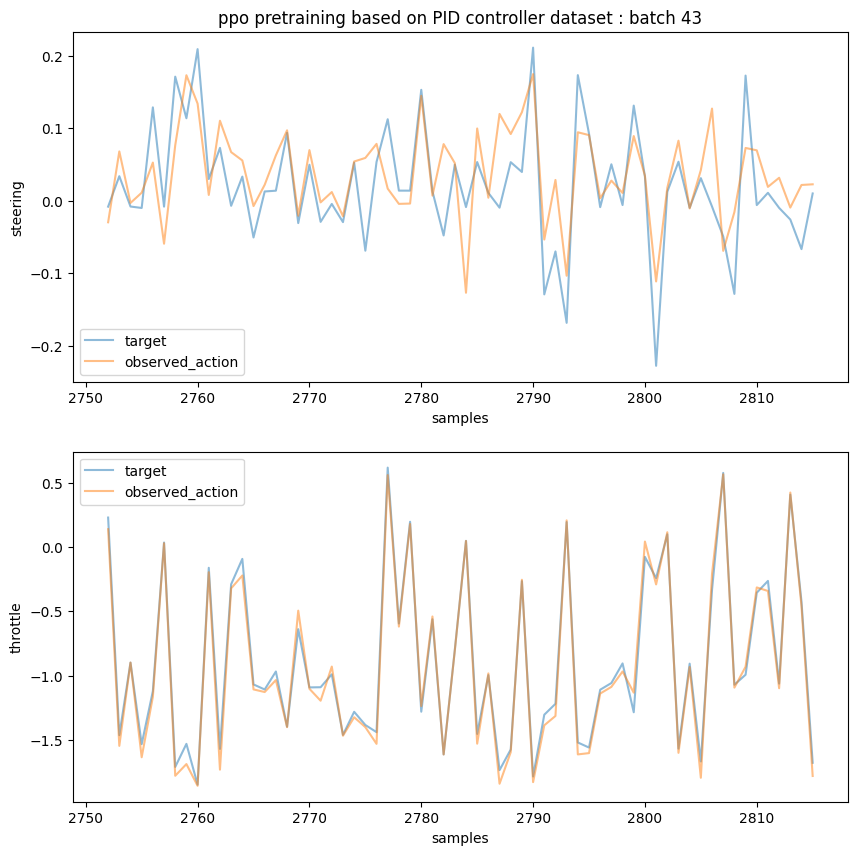

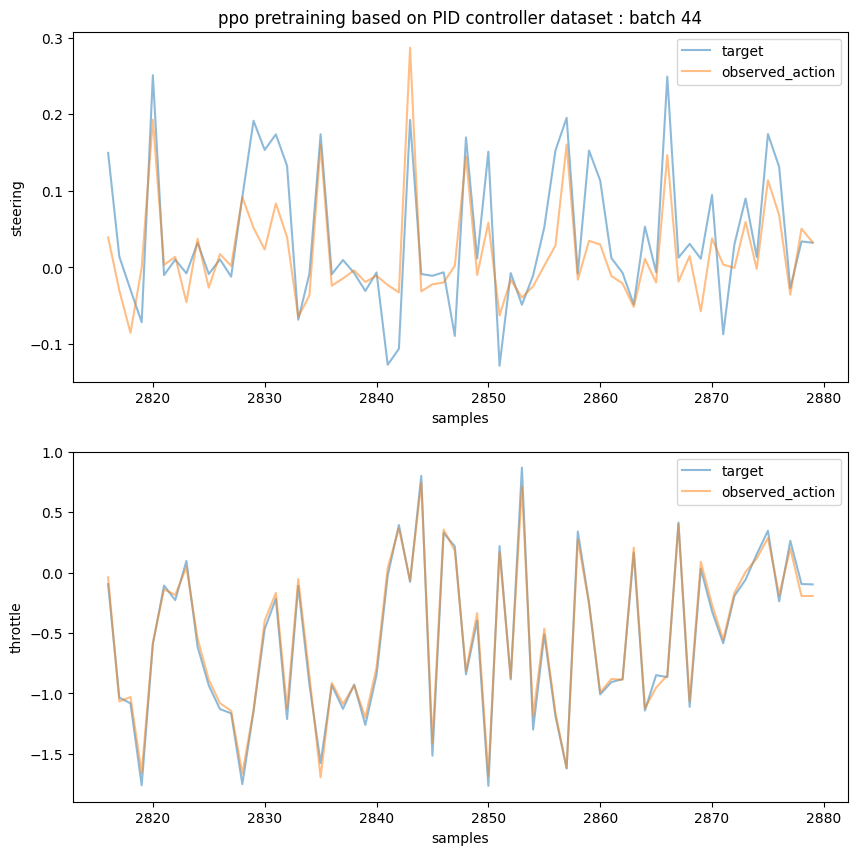

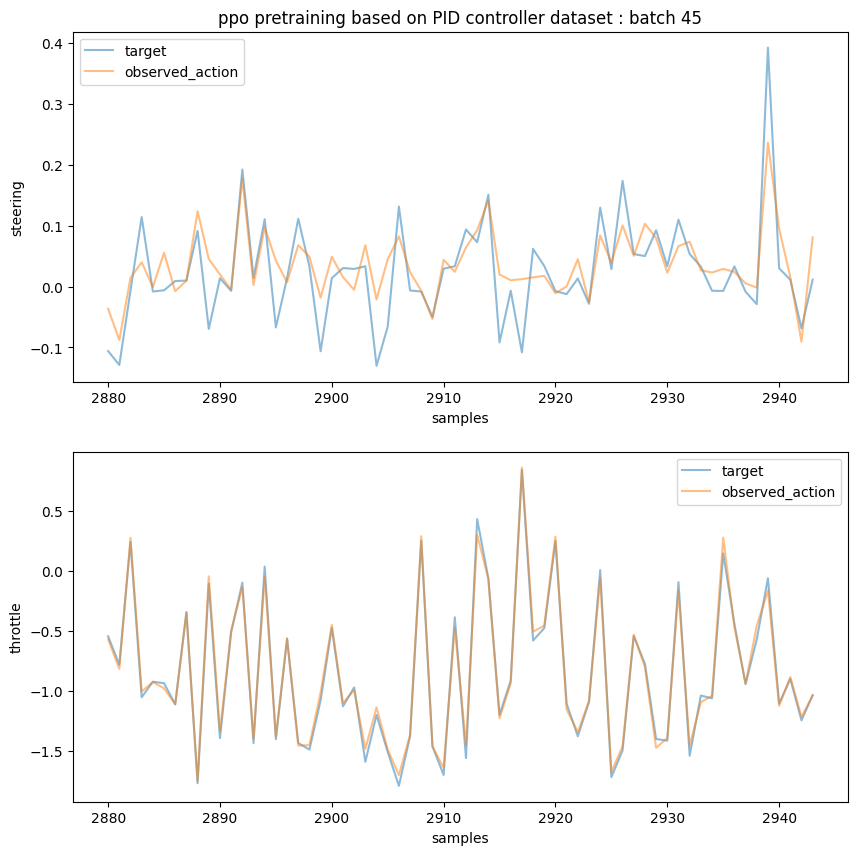

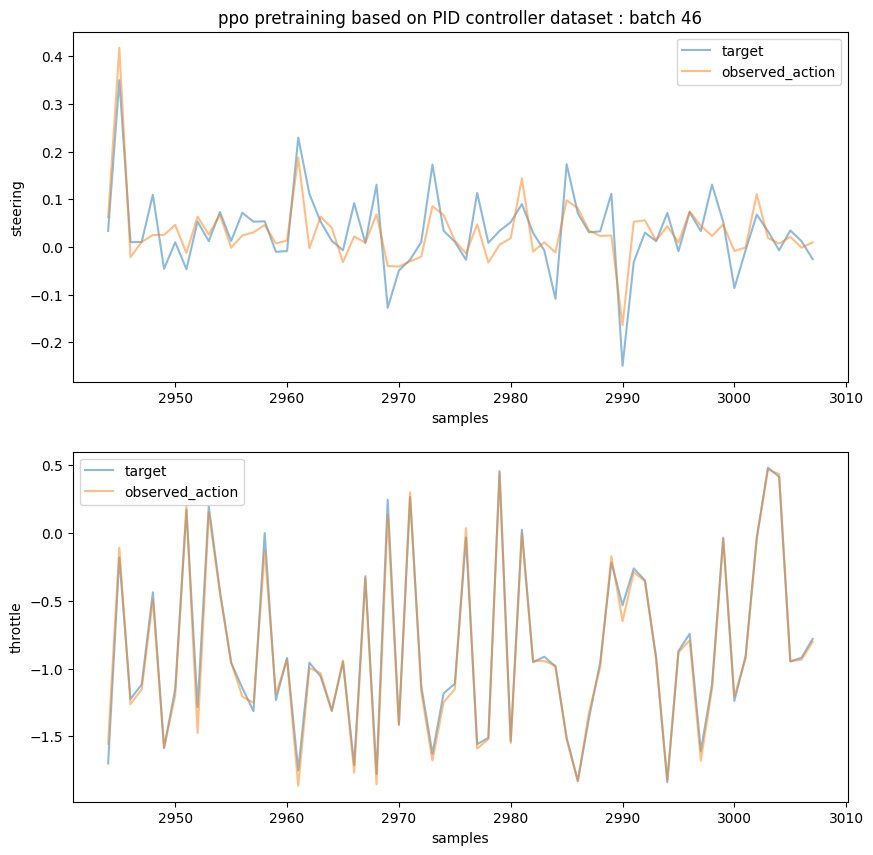

KeyboardInterrupt: 

In [3]:
df = pd.read_csv("../data/RL/mse_normalized/pretraining.csv")

# iterate over the df to plot the data

target_steering = df["target_steering"].values
observed_steering = df["observed_steering"].values

target_throttle = df["target_throttle"].values
observed_throttle = df["observed_throttle"].values


x = np.arange(0, len(target_steering))

batch_size = 64

for i in range(len(target_steering)//batch_size):

    fig, ax = plt.subplots(2, figsize=(10, 10))

    ax[0].plot(x[i*batch_size:(i+1)*batch_size], target_steering[i*batch_size:(i+1)*batch_size], label="target", alpha=0.5)
    ax[0].plot(x[i*batch_size:(i+1)*batch_size], observed_steering[i*batch_size:(i+1)*batch_size], label="observed_action", alpha=0.5)

    ax[0].set_title("ppo pretraining based on PID controller dataset : batch {}".format(i)) 
    ax[0].set_xlabel("samples")
    ax[0].set_ylabel("steering")
    ax[0].legend()

    ax[1].plot(x[i*batch_size:(i+1)*batch_size], target_throttle[i*batch_size:(i+1)*batch_size], label="target", alpha=0.5)
    ax[1].plot(x[i*batch_size:(i+1)*batch_size], observed_throttle[i*batch_size:(i+1)*batch_size], label="observed_action", alpha=0.5)

    ax[1].set_xlabel("samples")
    ax[1].set_ylabel("throttle")
    ax[1].legend()

    #plt.savefig(f"../plot/RL/actions_pretraining_{i}.png")

    plt.show()

### Plot of the loss